<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/K_means_(Universities)_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving Universities.csv to Universities.csv


In [69]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [70]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [71]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [72]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [74]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([9.18208121]),
 array([7.85555167]),
 array([7.25946556]),
 array([6.19004128]),
 array([5.53550096]),
 array([4.99931532])]

([<matplotlib.axis.XTick at 0x7f6baa6b56a0>,
 <a list of 6 Text major ticklabel objects>)

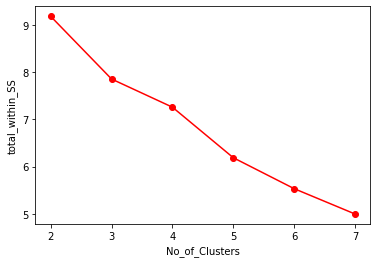

In [75]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [76]:
kmeans_clust=KMeans(n_clusters=3)
kmeans_clust.fit(df_norm)
Clusters=pd.DataFrame(kmeans_clust.labels_,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,1
3,1
4,1
5,2
6,2
7,1
8,2
9,2


In [77]:
Univ['h_clusterid'] = pd.DataFrame(Clusters)

In [78]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [79]:
#Grouping Data for predictions further 

result=Univ.iloc[:,1:].groupby(Univ.h_clusterid).mean()

In [80]:
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.0,71.75,0
1,1258.181818,77.545455,41.727273,12.818182,22872.0,87.00,1
2,1357.500000,90.400000,24.100000,10.000000,39329.6,92.40,2
